# Group Analysis

In [99]:
import pandas as pd
import numpy as np
import os
import pyCompare
import seaborn as sns
import matplotlib.pyplot as plt

data_dir = '/Volumes/schnyer/Megan/Wearables/data/'
results_dir = '/Volumes/schnyer/Megan/Wearables/results/'

In [97]:
cr = pd.read_csv(results_dir + 'cr_cosinor_df.csv').dropna()
npar = pd.read_csv(results_dir + 'cr_nonpar_df.csv').dropna()
cor = pd.read_csv(results_dir + 'ts_correlations.csv')

In [103]:
cor['group'] = np.where(cor['subject'] < 20000, 1, 2)
cor

,subject,missing_percent,r,r_preproc,r_active,r_rest,r_sleep,group
0,10011,0.0,0.306025,0.306025,0.610211,-0.010389,-0.036698,1
1,10012,0.0,0.414465,0.414465,0.763764,-0.022911,-0.037695,1
2,10014,0.0,0.298392,0.298392,0.597933,-0.000671,-0.021798,1
3,10016,0.0,0.393890,0.393890,0.745424,-0.016503,-0.026028,1
4,10023,0.0,0.331449,0.331449,0.632910,-0.011966,-0.027752,1
5,10024,0.0,0.302848,0.302848,0.553297,-0.018414,-0.043422,1
6,10025,0.0,0.325862,0.325862,0.612293,-0.013218,-0.053745,1
7,10033,0.0,0.305860,0.305860,0.585953,0.004663,-0.039830,1
8,10035,0.0,0.250075,0.250075,0.484522,-0.022501,-0.034589,1
9,10038,0.0,0.316517,0.316517,0.617622,-0.019427,-0.041797,1


<AxesSubplot:xlabel='group', ylabel='r_preproc'>

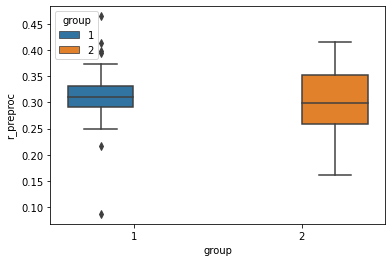

In [107]:
sns.boxplot(x='group', y='r_preproc', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_active'>

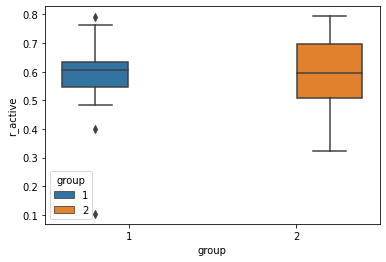

In [106]:
sns.boxplot(x='group', y='r_active', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_rest'>

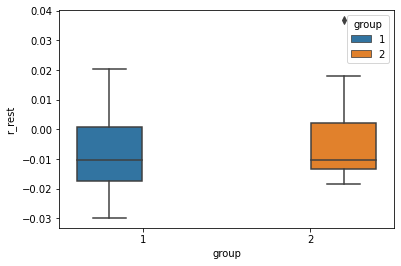

In [108]:
sns.boxplot(x='group', y='r_rest', hue='group', data=cor) 

<AxesSubplot:xlabel='group', ylabel='r_sleep'>

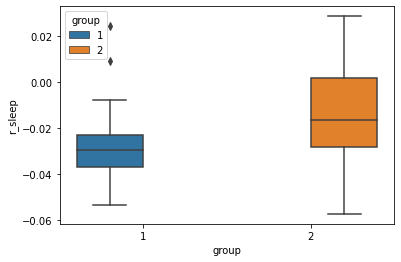

In [109]:
sns.boxplot(x='group', y='r_sleep', hue='group', data=cor) 

In [88]:
npar

,Unnamed: 0,IS,IV,RA,L5_start,L5,M10_start,M10,subject,device
0,0,0.075909,2.167133,0.903862,"[(5, 11, 0)]",0.002991,"[(18, 29, 0)]",0.059239,10011,Actiwatch
1,0,0.210442,0.164206,0.994501,"[(4, 56, 0)]",0.000261,"[(16, 37, 0)]",0.094548,10011,Fitbit
2,0,0.075122,2.082229,0.940046,"[(6, 57, 0)]",0.000652,"[(22, 18, 0)]",0.021110,10012,Actiwatch
3,0,0.238561,0.076745,0.989852,"[(6, 56, 0)]",0.000522,"[(20, 33, 0)]",0.102290,10012,Fitbit
4,0,0.098643,2.176645,0.936865,"[(7, 29, 0)]",0.002044,"[(18, 7, 0)]",0.062699,10014,Actiwatch
...,...,...,...,...,...,...,...,...,...,...
89,0,0.213494,0.077700,0.986497,"[(6, 8, 0)]",0.000642,"[(17, 39, 0)]",0.094421,20181,Fitbit
90,0,0.102870,2.072449,0.949717,"[(4, 46, 0)]",0.000640,"[(18, 37, 0)]",0.024815,20182,Actiwatch
91,0,0.249981,0.094143,0.994527,"[(4, 25, 0)]",0.000309,"[(17, 42, 0)]",0.112680,20182,Fitbit
92,0,0.094778,2.283255,0.964510,"[(5, 9, 0)]",0.000682,"[(17, 47, 0)]",0.037774,20184,Actiwatch


# Cosinor Measure Bland-Altman Agreement

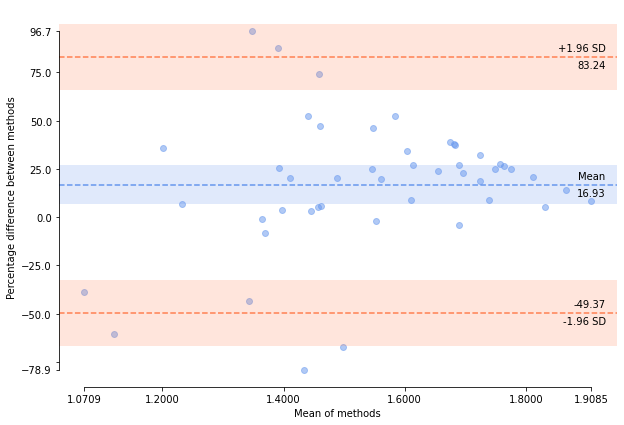

In [80]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['amp'].values, cr[cr['device'] == 'Fitbit']['amp'].values, percentage=True)

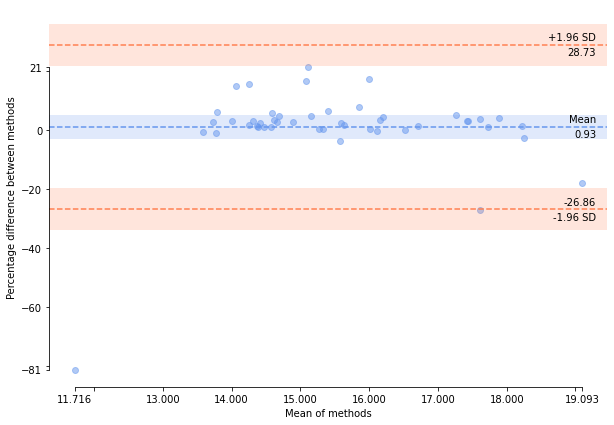

In [81]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['phi'].values, cr[cr['device'] == 'Fitbit']['phi'].values, percentage=True)

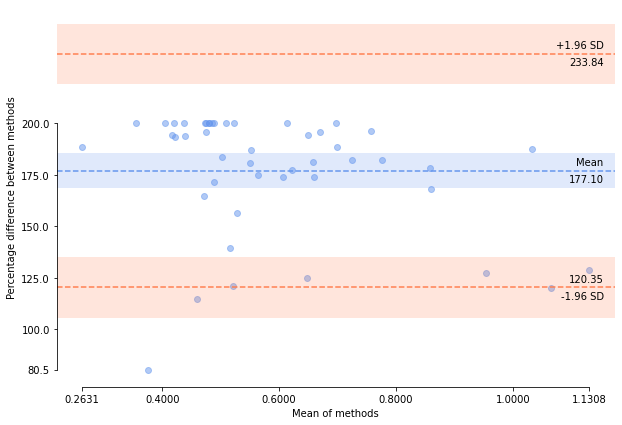

In [82]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['actmin'].values, cr[cr['device'] == 'Fitbit']['actmin'].values, percentage=True)

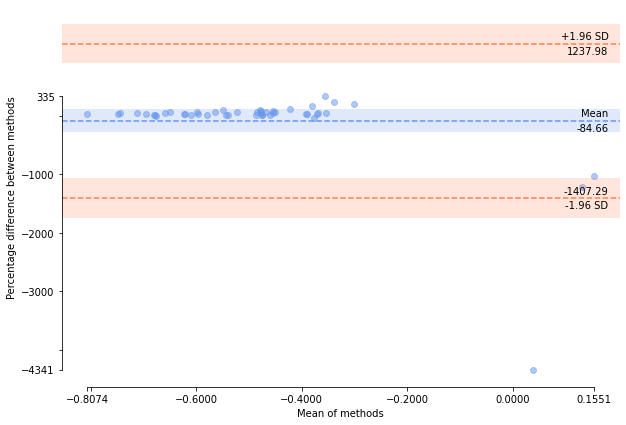

In [83]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['alpha'].values, cr[cr['device'] == 'Fitbit']['alpha'].values, percentage=True)

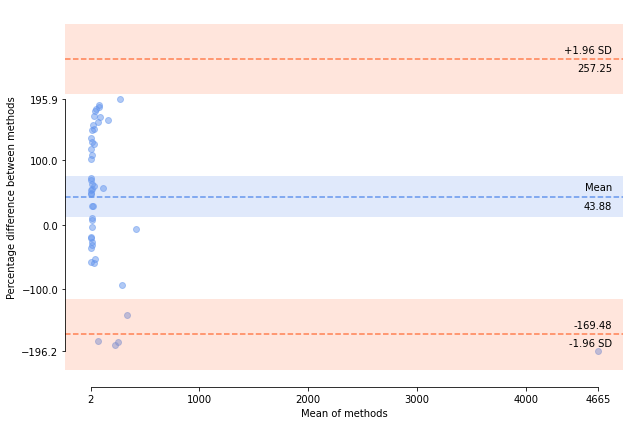

In [84]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['beta'].values, cr[cr['device'] == 'Fitbit']['beta'].values, percentage=True)

# Non-parametric Measure Bland-Altman Agreement

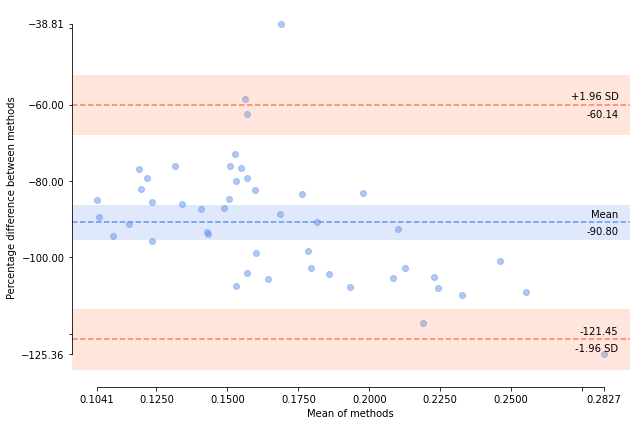

In [76]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IS'].values, npar[npar['device'] == 'Fitbit']['IS'].values, percentage=True)

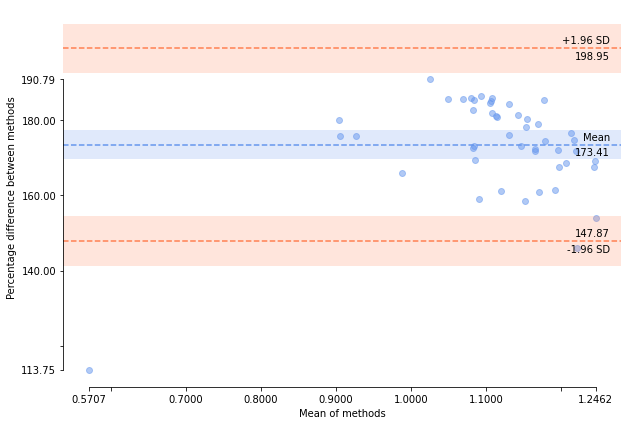

In [77]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IV'].values, npar[npar['device'] == 'Fitbit']['IV'].values, percentage=True)

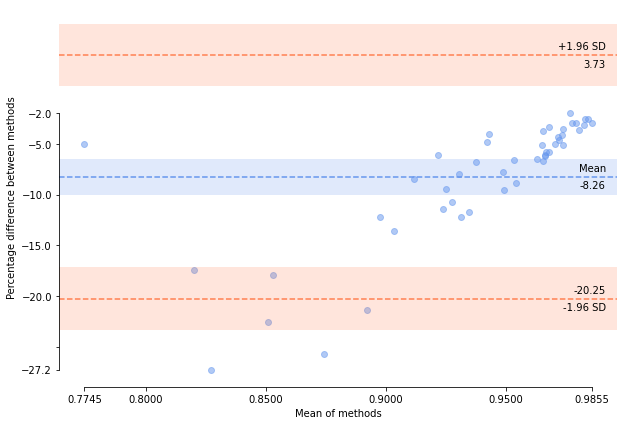

In [78]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['RA'].values, npar[npar['device'] == 'Fitbit']['RA'].values, percentage=True)

# Cosinor Measure Bland-Altman Agreement

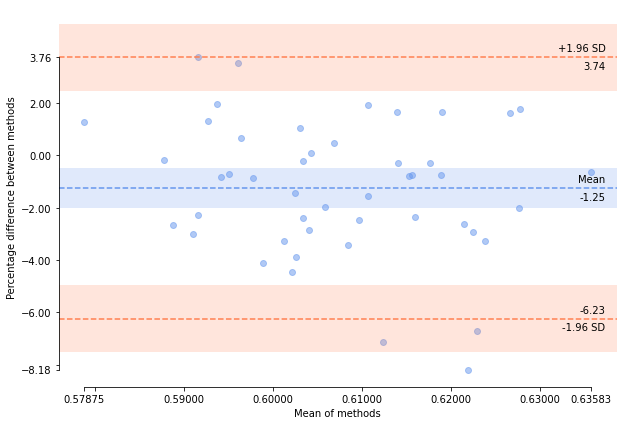

In [89]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['amp'].values, cr[cr['device'] == 'Fitbit']['amp'].values, percentage=True)

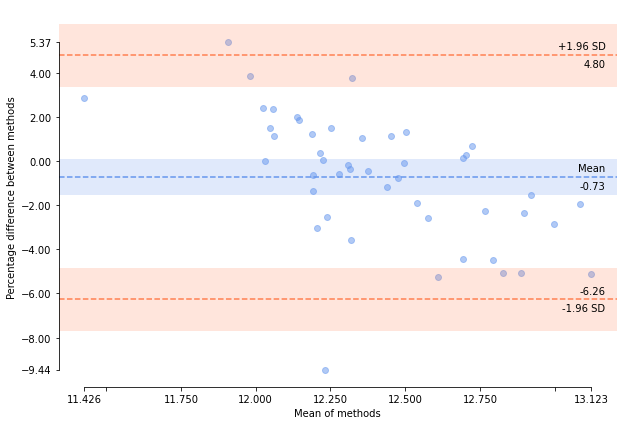

In [90]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['phi'].values, cr[cr['device'] == 'Fitbit']['phi'].values, percentage=True)

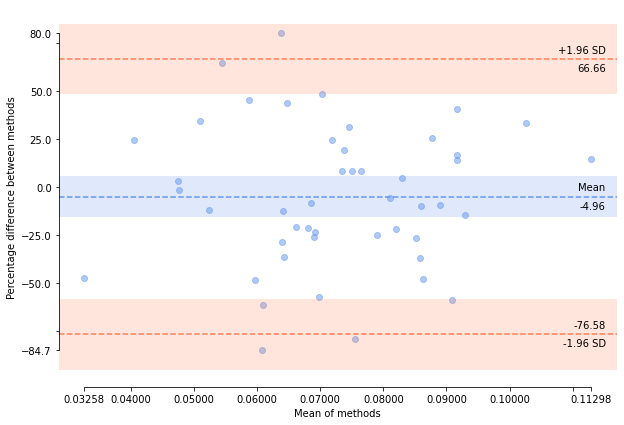

In [91]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['actmin'].values, cr[cr['device'] == 'Fitbit']['actmin'].values, percentage=True)

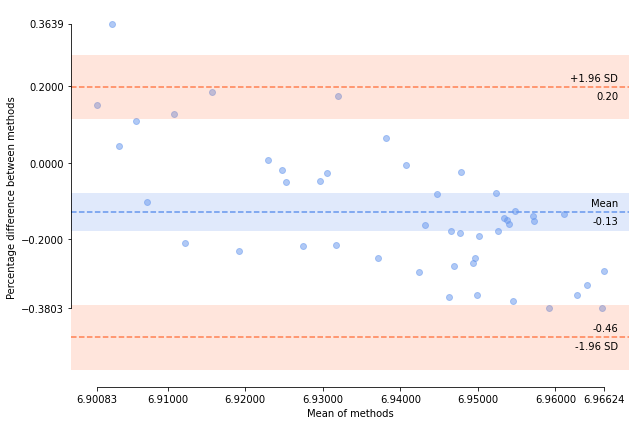

In [92]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['alpha'].values, cr[cr['device'] == 'Fitbit']['alpha'].values, percentage=True)

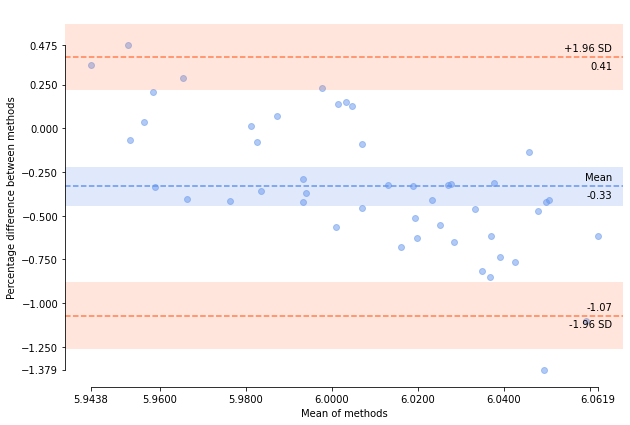

In [93]:
pyCompare.blandAltman(cr[cr['device'] == 'Actiwatch']['beta'].values, cr[cr['device'] == 'Fitbit']['beta'].values, percentage=True)

# Non-parametric Measure Bland-Altman Agreement

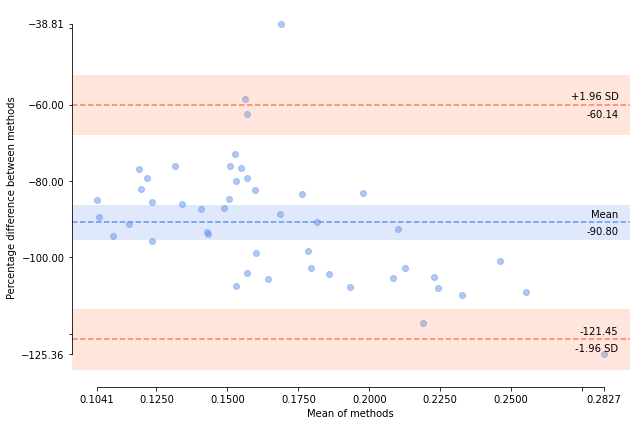

In [94]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IS'].values, npar[npar['device'] == 'Fitbit']['IS'].values, percentage=True)

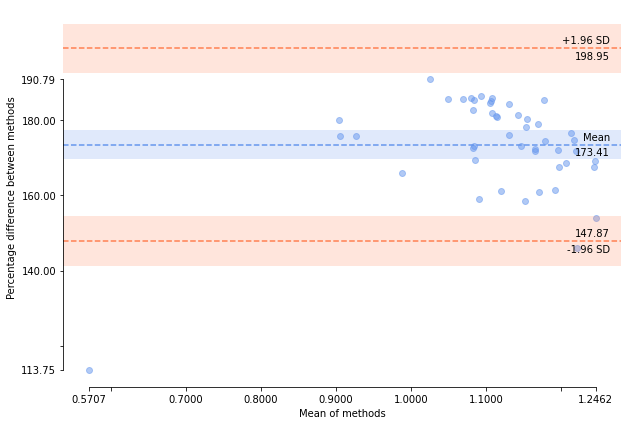

In [95]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['IV'].values, npar[npar['device'] == 'Fitbit']['IV'].values, percentage=True)

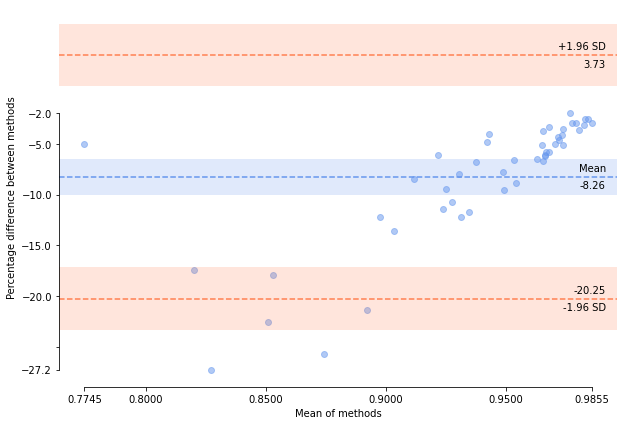

In [96]:
pyCompare.blandAltman(npar[npar['device'] == 'Actiwatch']['RA'].values, npar[npar['device'] == 'Fitbit']['RA'].values, percentage=True)

In [98]:
cor.

,subject,missing_percent,r,r_preproc,r_active,r_rest,r_sleep
0,10011,0.0,0.306025,0.306025,0.610211,-0.010389,-0.036698
1,10012,0.0,0.414465,0.414465,0.763764,-0.022911,-0.037695
2,10014,0.0,0.298392,0.298392,0.597933,-0.000671,-0.021798
3,10016,0.0,0.393890,0.393890,0.745424,-0.016503,-0.026028
4,10023,0.0,0.331449,0.331449,0.632910,-0.011966,-0.027752
5,10024,0.0,0.302848,0.302848,0.553297,-0.018414,-0.043422
6,10025,0.0,0.325862,0.325862,0.612293,-0.013218,-0.053745
7,10033,0.0,0.305860,0.305860,0.585953,0.004663,-0.039830
8,10035,0.0,0.250075,0.250075,0.484522,-0.022501,-0.034589
9,10038,0.0,0.316517,0.316517,0.617622,-0.019427,-0.041797
